## Download and Explore Dataset

In [1]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_99c9e14d6e6240ebb8674959ef3728d0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ftt1JfuVnPYIsasgSrUpvYTSamcgC0yW5PBhvTjm8YQh',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_99c9e14d6e6240ebb8674959ef3728d0.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-afqbv2r2yf8r0b',Key='Folkemengde.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body, sep=";")
df_data_1.head()

,region,Befolkning per 1.1. (personer) 2020,Areal (km2) 2020,Landareal (km2) 2020,Innbyggere per km2 landareal 2020
0,3001 Halden,31373,642,595,53
1,3002 Moss,49273,138,128,385
2,3003 Sarpsborg,56732,406,370,153
3,3004 Fredrikstad,82385,293,284,290
4,3005 Drammen,101386,318,305,332


In [2]:
n_municipalities = 200
df_data_1.columns = ['Region', 'Befolkning', 'Areal', 'Landareal', 'Innbyggere per km2 landareal']
df_data_1['Region'] = df_data_1['Region'].str.replace('aa', 'å').str.replace('Aa', 'Å').str.replace('oe', 'ø').str.replace('Oe', 'Ø').str.replace('ae', 'æ').str.replace('Ae', 'Æ').str[5:]
df_data_1['Region'] = df_data_1['Region'].str.replace('Oslo kommune', 'Oslo')
# df_data_1['Region'] = df_data_1['Region'].str[5:] #ta bort postnummer
df_data_2 = df_data_1.nlargest(n_municipalities, ['Befolkning']) 
df_data_2.head()

,Region,Befolkning,Areal,Landareal,Innbyggere per km2 landareal
51,Oslo,693494,454,426,1628
169,Bergen,283929,465,445,638
238,Trondheim,205163,529,496,414
147,Stavanger,143574,263,257,559
20,Bærum,127731,192,189,676


In [3]:
from  geopy.geocoders import Nominatim
geo = []
geo_pass = []

geolocator = Nominatim(user_agent='Kommunekampen')
country ='Norway'
i=0
for region in df_data_2['Region']:
    try: 
        loc = geolocator.geocode('bus stop '+region+','+ country, timeout=10)
        geo.append([region, loc.latitude, loc.longitude])
    except:
        geo_pass.append(region)

df_geo = pd.DataFrame(geo, columns = ['Region','Latitude','Longitude'])

df = pd.merge(df_data_2, df_geo, on='Region')
df.set_index('Region')
print(geo_pass)
print(df.head())


['Færder', 'Hustadvika', 'Sør-Varanger', 'Herøy (Møre og Romsdal)', 'Nordreisa', 'Hvaler', 'Grue']
      Region  Befolkning  Areal  Landareal  Innbyggere per km2 landareal  \
0       Oslo      693494    454        426                          1628   
1     Bergen      283929    465        445                           638   
2  Trondheim      205163    529        496                           414   
3  Stavanger      143574    263        257                           559   
4      Bærum      127731    192        189                           676   

    Latitude  Longitude  
0  59.913330  10.738970  
1  60.373705   5.339595  
2  63.430566  10.395193  
3  58.968960   5.729465  
4  59.919816  10.460409  


In [5]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 92kB 6.9MB/s eta 0:00:011
Libraries imported.


In [6]:
location = geolocator.geocode(country)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Norway are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_norway = folium.Map(location=[latitude, longitude], zoom_start=5)
# add markers to map
for lat, lng, region in zip(df['Latitude'], df['Longitude'], df['Region']):
    label = folium.Popup(region, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_norway)
    
map_norway

The geograpical coordinate of Norway are 64.5731537, 11.52803643954819.


#### Define Foursquare Credentials and Version

In [7]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests # library to handle requests


CLIENT_ID = 'ERDVFRWHSSDZC04NV1XRDYEDCZUTKO4XZNCDZLALI4WPAH2I' # your Foursquare ID
CLIENT_SECRET = 'K2JQNLKGTTXQLB42S22LIC25IJ5I2OOROXPKOBRNBOK1YFTZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ERDVFRWHSSDZC04NV1XRDYEDCZUTKO4XZNCDZLALI4WPAH2I
CLIENT_SECRET:K2JQNLKGTTXQLB42S22LIC25IJ5I2OOROXPKOBRNBOK1YFTZ


#### Exploring the largest municipality in our dataframe.

In [8]:
by = df.loc[0, 'Region']
latitude_first = df.loc[0, 'Latitude'] # neighborhood latitude value
longitude_first = df.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(by, latitude_first, longitude_first))

Latitude and longitude values of Oslo are 59.9133301, 10.7389701.


#### Get the top 100 venues that are in Oslo within a radius of 2000 meters.

In [9]:
LIMIT = 100
Radius = 2000

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_first, longitude_first, VERSION, Radius, LIMIT)
results = requests.get(url).json()

#### Create function that extracts the category of the venue

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Clean the json and structure it into a pandas dataframe.

In [11]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Ben & Jerry's,Ice Cream Shop,59.914360,10.737109
1,Stockfleths,Coffee Shop,59.913656,10.741206
2,Nordvegan,Vegetarian / Vegan Restaurant,59.915591,10.737863
3,Det Norske Teatret,Theater,59.915360,10.738657
4,Tronsmo Bøker & Tegneserier,Bookstore,59.916505,10.738620


## Explore municipalities in Norway

#### Function to repeat the same process to the municipalities in Norway

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=Radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url)
#        print(results) # print response code for debugging
        results = results.json()["response"]["groups"][0]['items']    
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Region', 
                  'Region Latitude', 
                  'Region Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    
    return(nearby_venues)

#### Create a new dataframe

In [13]:
norway_venues = getNearbyVenues(names=df['Region'], latitudes=df['Latitude'], longitudes=df['Longitude'])
norway_venues.head()

,Region,Region Latitude,Region Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Oslo,59.91333,10.73897,Ben & Jerry's,59.914360,10.737109,Ice Cream Shop
1,Oslo,59.91333,10.73897,Stockfleths,59.913656,10.741206,Coffee Shop
2,Oslo,59.91333,10.73897,Nordvegan,59.915591,10.737863,Vegetarian / Vegan Restaurant
3,Oslo,59.91333,10.73897,Det Norske Teatret,59.915360,10.738657,Theater
4,Oslo,59.91333,10.73897,Tronsmo Bøker & Tegneserier,59.916505,10.738620,Bookstore


#### The size of the resulting dataframe

In [14]:
norway_venues.shape

(1911, 7)

#### How many venues were returned for each municipality

In [15]:
norway_venues_grouped = norway_venues.groupby('Region').count()
norway_venues_grouped

,Region Latitude,Region Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Region,,,,,,
Alstahaug,1,1,1,1,1,1
Alta,17,17,17,17,17,17
Alver,3,3,3,3,3,3
Andøy,4,4,4,4,4,4
Arendal,26,26,26,26,26,26
Asker,17,17,17,17,17,17
Askøy,7,7,7,7,7,7
Austevoll,2,2,2,2,2,2
Averøy,6,6,6,6,6,6


In [54]:
max_venues = norway_venues_grouped['Venue'].loc[norway_venues_grouped['Venue'] == 100]
print(max_venues)

Region
Oslo    100
Name: Venue, dtype: int64


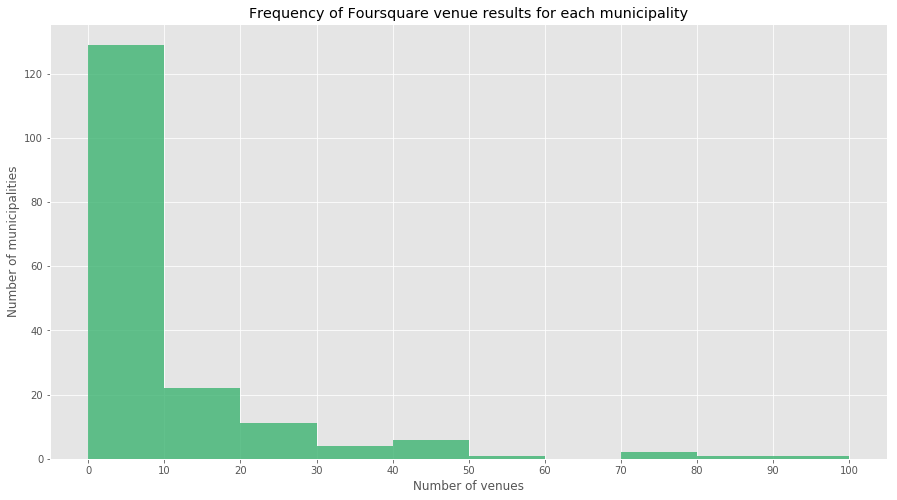

In [16]:
bin_edges = np.linspace(0, 100, 11)
norway_venues_grouped['Venue'].plot(kind='hist',
                                    range = (0,100),
                                    figsize=(15,8),
                                    xticks=bin_edges,
                                    alpha = 0.8,
                                   color='mediumseagreen')

plt.title('Frequency of Foursquare venue results for each municipality')
plt.xlabel('Number of venues')
plt.ylabel('Number of municipalities')

plt.show()

#### How many unique categories can be curated from all the returned venues

In [17]:
print('There are {} uniques categories.'.format(len(norway_venues['Venue Category'].unique())))

There are 216 uniques categories.


## Analyze each municipality

In [18]:
# one hot encoding
norway_onehot = pd.get_dummies(norway_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
norway_onehot['Region'] = norway_venues['Region'] 

# move neighborhood column to the first column
fixed_columns = [norway_onehot.columns[-1]] + list(norway_onehot.columns[:-1])
norway_onehot = norway_onehot[fixed_columns]

norway_onehot.head()

,Region,Airport,Airport Gate,Airport Terminal,American Restaurant,Antique Shop,Apres Ski Bar,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Trail,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Campground,Caribbean Restaurant,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Coworking Space,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Electronics Store,Exhibit,Factory,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Forest,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health Food Store,Hill,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Lake,Library,Lighthouse,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Miscellaneous Shop,Modern European Restaurant,Motel,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Office,Opera House,Other Nightlife,Other Repair Shop,Paintball Field,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Port,Pub,RV Park,Record Shop,Recreation Center,Rental Car Location,Resort,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Sausage Shop,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shop & Service,Shopping Mall,Skate Park,Ski Area,Ski Chairlift,Ski Chalet,Ski Lodge,Ski Trail,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Tourist Information Center,Toy / Game Store,Trail,Train,Train Station,Travel Agency,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,Oslo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Oslo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Oslo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Examine the new dataframe size

In [19]:
norway_onehot.shape

(1911, 217)

#### Group rows by municipality and by taking the mean of the frequency of occurrence of each category

In [20]:
norway_grouped = norway_onehot.groupby('Region').mean().reset_index()
norway_grouped

,Region,Airport,Airport Gate,Airport Terminal,American Restaurant,Antique Shop,Apres Ski Bar,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Trail,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Campground,Caribbean Restaurant,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Coworking Space,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Electronics Store,Exhibit,Factory,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Forest,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health Food Store,Hill,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Lake,Library,Lighthouse,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Miscellaneous Shop,Modern European Restaurant,Motel,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Office,Opera House,Other Nightlife,Other Repair Shop,Paintball Field,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Port,Pub,RV Park,Record Shop,Recreation Center,Rental Car Location,Resort,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Sausage Shop,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shop & Service,Shopping Mall,Skate Park,Ski Area,Ski Chairlift,Ski Chalet,Ski Lodge,Ski Trail,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Tourist Information Center,Toy / Game Store,Trail,Train,Train Station,Travel Agency,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,Alstahaug,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

#### Confirm the grouped size

In [21]:
norway_grouped.shape

(177, 217)

#### Find 10 most commonly occuring venues

In [22]:
venues_grouped = norway_grouped.drop('Region', axis=1)
venues_grouped = venues_grouped[venues_grouped > 0.0].count()
venues_grouped = venues_grouped.nlargest(10) 
print(venues_grouped)

Grocery Store      76
Hotel              74
Shopping Mall      69
Café               59
Supermarket        59
Train Station      45
Restaurant         43
Pizza Place        42
Harbor / Marina    27
Coffee Shop        25
dtype: int64


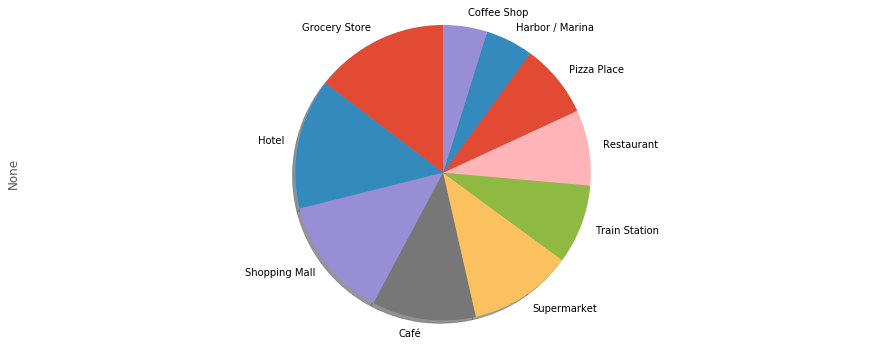

In [42]:
venues_grouped.plot(kind='pie',
                    figsize=(15, 6),
#                    autopct='%1.1f%%', 
                    startangle=90,    
                    shadow=True,       
#                    labels=None,         # turn off labels on pie chart
                    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
#                            colors=colors_list,  # add custom colors
#                            explode=explode_list # 'explode' lowest 3 continents
                    )
# scale the title up by 12% to match pctdistance


plt.axis('equal') 

# add legend
#plt.legend(labels=venues_grouped.index, loc='upper left') 

plt.show()

#### Print each municipality along with the top 5 most common venues

In [24]:
num_top_venues = 5

for city in norway_grouped['Region']:
    print("----"+city+"----")
    temp = norway_grouped[norway_grouped['Region'] == city].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alstahaug----
                     Venue  Freq
0            Boat or Ferry   1.0
1                  Airport   0.0
2         Pedestrian Plaza   0.0
3             Neighborhood   0.0
4  New American Restaurant   0.0


----Alta----
                Venue  Freq
0               Hotel  0.29
1           Gastropub  0.06
2  Chinese Restaurant  0.06
3         Supermarket  0.06
4       Shopping Mall  0.06


----Alver----
                     Venue  Freq
0   Furniture / Home Store  0.33
1            Shopping Mall  0.33
2               Campground  0.33
3             Neighborhood  0.00
4  New American Restaurant  0.00


----Andøy----
                  Venue  Freq
0                  Pier  0.25
1       Harbor / Marina  0.25
2  Gym / Fitness Center  0.25
3         Grocery Store  0.25
4               Airport  0.00


----Arendal----
           Venue  Freq
0           Café  0.15
1  Grocery Store  0.12
2          Hotel  0.08
3     Restaurant  0.08
4  Boat or Ferry  0.04


----Asker----
                   

#### Function to sort the venues in descending order.

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    norway_grouped.iloc[num_top_venues, :]
    pos_count = sum(x > 0 for x in row_categories_sorted)
    if pos_count>(num_top_venues-1):
        return row_categories_sorted.index.values[0:num_top_venues]
    else:
        row_categories_sorted.index.values[pos_count:num_top_venues] = None
        return row_categories_sorted.index.values[0:num_top_venues]

#### Create the new dataframe and display the top 10 venues for each municipality

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Region']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
municipality_venues_sorted = pd.DataFrame(columns=columns)
municipality_venues_sorted['Region'] = norway_grouped['Region']

for ind in np.arange(norway_grouped.shape[0]):
    municipality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(norway_grouped.iloc[ind, :], num_top_venues)

municipality_venues_sorted.head(20)

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alstahaug,Boat or Ferry,None,None,None,None,None,None,None,None,None
1,Alta,Hotel,Automotive Shop,Gym / Fitness Center,Grocery Store,Gastropub,Music Venue,Pizza Place,Chinese Restaurant,Salad Place,Shopping Mall
2,Alver,Shopping Mall,Furniture / Home Store,Campground,None,None,None,None,None,None,None
3,Andøy,Harbor / Marina,Gym / Fitness Center,Pier,Grocery Store,None,None,None,None,None,None
4,Arendal,Café,Grocery Store,Hotel,Restaurant,Shopping Mall,Bar,Steakhouse,Flower Shop,Movie Theater,Boat or Ferry
5,Asker,Grocery Store,Train Station,Coffee Shop,Café,Supermarket,Movie Theater,Nightclub,Furniture / Home Store,Italian Restaurant,Hotel
6,Askøy,Mountain,Coffee Shop,Department Store,Trail,Grocery Store,Gourmet Shop,None,None,None,None
7,Austevoll,Construction & Landscaping,Bakery,None,None,None,None,None,None,None,None
8,Averøy,Stadium,Pizza Place,Pier,Supermarket,Salon / Barbershop,Shopping Mall,None,None,None,None
9,Bamble,Convenience Store,Paintball Field,None,None,None,None,None,None,None,None


## Cluster municipalities
#### Run k-means to cluster the municipalities into clusters

In [27]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 11

norway_grouped_clustering = norway_grouped.drop('Region', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(norway_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 3, 0, 3, 0, 0, 0, 0], dtype=int32)

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each municipality

In [28]:
# add clustering labels
municipality_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

norway_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
norway_merged = norway_merged.join(municipality_venues_sorted.set_index('Region'), on='Region', how = 'right')

norway_merged.head(150)

,Region,Befolkning,Areal,Landareal,Innbyggere per km2 landareal,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Oslo,693494,454,426,1628,59.913330,10.738970,0,Coffee Shop,Scandinavian Restaurant,Bar,Burger Joint,Restaurant,Park,Indian Restaurant,Hotel,Cocktail Bar,Scenic Lookout
1,Bergen,283929,465,445,638,60.373705,5.339595,0,Hotel,Grocery Store,Bar,Art Gallery,Café,Coffee Shop,Bus Stop,Pizza Place,Park,Hostel
2,Trondheim,205163,529,496,414,63.430566,10.395193,0,Coffee Shop,Restaurant,Café,Pub,Park,Bar,Sports Bar,Hostel,Gym,Sushi Restaurant
3,Stavanger,143574,263,257,559,58.968960,5.729465,0,Hotel,Bar,Café,Coffee Shop,Grocery Store,Indian Restaurant,Asian Restaurant,French Restaurant,Italian Restaurant,Diner
4,Bærum,127731,192,189,676,59.919816,10.460409,3,Grocery Store,Automotive Shop,Gas Station,Department Store,Supermarket,Basketball Court,Market,None,None,None
5,Kristiansand,111633,644,610,183,58.146150,7.995733,0,Hotel,Coffee Shop,Grocery Store,Restaurant,Pub,Boat or Ferry,Pizza Place,Park,Scandinavian Restaurant,Plaza
6,Drammen,101386,318,305,332,59.743675,10.204375,0,Bar,Hotel,Train Station,Pizza Place,Plaza,Shopping Mall,Bakery,Sushi Restaurant,Coffee Shop,Water Park
7,Asker,94441,377,364,259,59.835234,10.432976,3,Grocery Store,Train Station,Coffee Shop,Café,Supermarket,Movie Theater,Nightclub,Furniture / Home Store,Italian Restaurant,Hotel
8,Lillestrøm,85983,457,410,210,59.956725,11.049356,0,Supermarket,Sushi Restaurant,Grocery Store,Gym / Fitness Center,Italian Restaurant,Restaurant,Café,Chinese Restaurant,Soccer Field,Pub
9,Fredrikstad,82385,293,284,290,59.218166,10.929761,0,Hotel,Gastropub,Park,Pizza Place,Grocery Store,Italian Restaurant,Gas Station,Food & Drink Shop,Movie Theater,Sushi Restaurant


#### Visualize the resulting clusters

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(norway_merged['Latitude'], norway_merged['Longitude'], norway_merged['Region'], norway_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine each cluster and determine the discriminating venue categories that distinguish each cluster

In [30]:
norway_merged.loc[norway_merged['Cluster Labels'] == 0, norway_merged.columns[[1] + list(range(5, norway_merged.shape[1]))]]

,Befolkning,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,693494,59.913330,10.738970,0,Coffee Shop,Scandinavian Restaurant,Bar,Burger Joint,Restaurant,Park,Indian Restaurant,Hotel,Cocktail Bar,Scenic Lookout
1,283929,60.373705,5.339595,0,Hotel,Grocery Store,Bar,Art Gallery,Café,Coffee Shop,Bus Stop,Pizza Place,Park,Hostel
2,205163,63.430566,10.395193,0,Coffee Shop,Restaurant,Café,Pub,Park,Bar,Sports Bar,Hostel,Gym,Sushi Restaurant
3,143574,58.968960,5.729465,0,Hotel,Bar,Café,Coffee Shop,Grocery Store,Indian Restaurant,Asian Restaurant,French Restaurant,Italian Restaurant,Diner
5,111633,58.146150,7.995733,0,Hotel,Coffee Shop,Grocery Store,Restaurant,Pub,Boat or Ferry,Pizza Place,Park,Scandinavian Restaurant,Plaza
6,101386,59.743675,10.204375,0,Bar,Hotel,Train Station,Pizza Place,Plaza,Shopping Mall,Bakery,Sushi Restaurant,Coffee Shop,Water Park
8,85983,59.956725,11.049356,0,Supermarket,Sushi Restaurant,Grocery Store,Gym / Fitness Center,Italian Restaurant,Restaurant,Café,Chinese Restaurant,Soccer Field,Pub
9,82385,59.218166,10.929761,0,Hotel,Gastropub,Park,Pizza Place,Grocery Store,Italian Restaurant,Gas Station,Food & Drink Shop,Movie Theater,Sushi Restaurant
10,79537,58.851782,5.736991,0,Supermarket,Sushi Restaurant,Shopping Mall,Hotel,Italian Restaurant,Café,Steakhouse,Soccer Stadium,Gym / Fitness Center,Science Museum
11,76974,69.683805,18.980867,0,Grocery Store,Convenience Store,Italian Restaurant,Stadium,Garden,Café,Indoor Play Area,Science Museum,Botanical Garden,Pizza Place


Cluster 1:
(113, 10)
          1st Most Common Venue       2nd Most Common Venue  \
0                   Coffee Shop     Scandinavian Restaurant   
1                         Hotel               Grocery Store   
2                   Coffee Shop                  Restaurant   
3                         Hotel                         Bar   
5                         Hotel                 Coffee Shop   
6                           Bar                       Hotel   
8                   Supermarket            Sushi Restaurant   
9                         Hotel                   Gastropub   
10                  Supermarket            Sushi Restaurant   
11                Grocery Store           Convenience Store   
12                        Hotel                  Restaurant   
13                Grocery Store                       Hotel   
14                 Burger Joint                     Stadium   
15         Fast Food Restaurant               Shopping Mall   
16                          Bar   

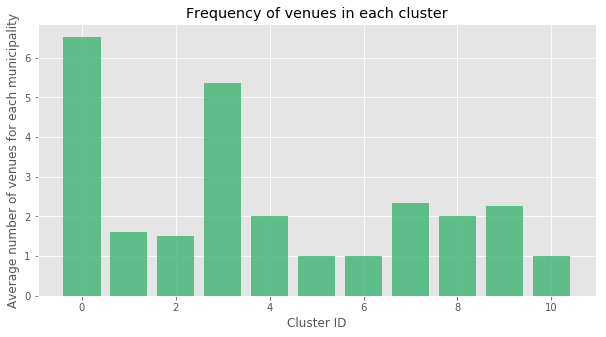

In [73]:
n_venues_in_clusters = []

for i in range(kclusters):
    print('Cluster {}:'.format(i+1))
    cluster_venues = norway_merged.loc[norway_merged['Cluster Labels'] == i, norway_merged.columns[[1] + list(range(5, norway_merged.shape[1]))]]
    cluster_venues = cluster_venues.drop(['Befolkning', 'Latitude', 'Longitude', 'Cluster Labels'], axis=1)
    n_venues_in_clusters.append(np.average(cluster_venues.count(axis=1)))
    print(cluster_venues.shape)
    print(cluster_venues)




bins = np.linspace(0, kclusters-1, kclusters)
plt.figure(figsize=(10,5))
plt.bar(bins, n_venues_in_clusters, align='center', alpha=0.8, color='mediumseagreen')
plt.title('Frequency of venues in each cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Average number of venues for each municipality')

plt.show()